# Plot Model Estimates Onto Brain Maps

    Author: Paul A. Bloom
    Date: February 16, 2019

In [1]:
import nilearn
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import glob
import re

### Import csv of model outputs and make compressed nifti files for each roi, then add together to make whole-brain map


In [ ]:
# Import CSV
modOutput = pd.read_csv('../../estimates/spreadsheets/mod0.csv')


In [1]:
# Function to put the whole-brain parcellation statmap together from the estimate images
def makeStatMap(estimates, rois, mapName):
    os.system('mkdir ../../estimates/temp')
    temps = [None]*(len(estimates))
    
    for index, estimate in enumerate(estimates):
        roiMask = '../../roi/' + rois[index] + '.nii.gz'
        tempsMap = '../../estimates/temp/'
        temps[index] = '../../estimates/temp/' + rois[index] + '.nii.gz'
        os.system('fslmaths %s -mul %s %s'%(roiMask, estimate, temps[index]))
        if index == 0:
            os.system('fslmaths %s -mul 1 %s'%(temps[index], tempsMap))
        else:
            os.system('fslmaths %s -add %s %s'%(tempsMap, temps[index], tempsMap))
            
    finalOutput = '../../estimates/images/%s.nii.gz'%(mapName)
    os.system('cp %s.nii.gz %s'%(tempsMap, finalOutput))
    os.system('rm -rf ../../estimates/temp/')
    
    
    
    

In [29]:
# Run the function to output whole-brain roi maps
makeStatMap(modOutput['cope_mean_scaled'], modOutput['roi'], 'mod0_mean')
makeStatMap(modOutput['theta_int_95_lower'], modOutput['roi'], 'mod0_int_95_lower')
makeStatMap(modOutput['theta_int_95_upper'], modOutput['roi'], 'mod0_int_95_upper')

## Plot the Roi Maps!

In [2]:
meanPath = '../../estimates/images/mod0_mean.nii.gz'
lwr_95Path = '../../estimates/images/mod0_int_95_lower.nii.gz'
upr_95Path ='../../estimates/images/mod0_int_95_upper.nii.gz'
meanMod0 = image.load_img(meanPath)
lwr_95Mod0 = image.load_img(lwr_95Path)
upr_95Mod0 = image.load_img(upr_95Path)

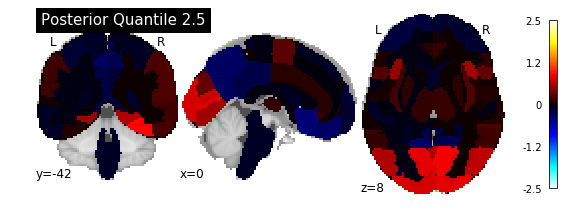

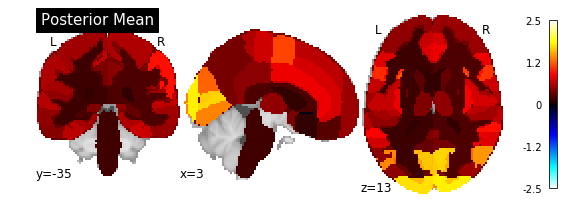

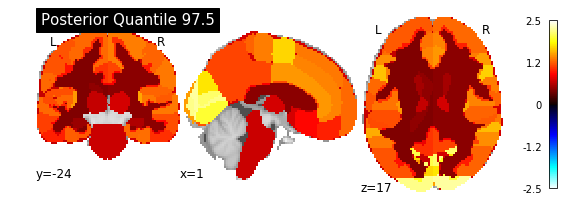

In [5]:
mapLwr = plotting.plot_stat_map(lwr_95Mod0, title = 'Posterior Quantile 2.5', vmax = 2.5, symmetric_cbar =True, draw_cross = False)
mapMean = plotting.plot_stat_map(meanMod0, title = 'Posterior Mean', vmax = 2.5, symmetric_cbar =True, draw_cross = False)
mapUpr = plotting.plot_stat_map(upr_95Mod0, title = 'Posterior Quantile 97.5', vmax = 2.5, symmetric_cbar =True, draw_cross = False)
mapLwr.savefig('lwrMod0.pdf')
mapMean.savefig('meanMod0.pdf')
mapUpr.savefig('uprMod0.pdf')

## Compare with mean t-stat map from a mass univariate approach


In [7]:
univariateMap = '/danl/SB/PaulCompileTGNG/mri_scripts/6_neuropointillist/haba/6motion_no_errors_comps_age_center_nlme/ageCenterNLME.meanTstat.nii.gz'
univariateMap = image.load_img(univariateMap)

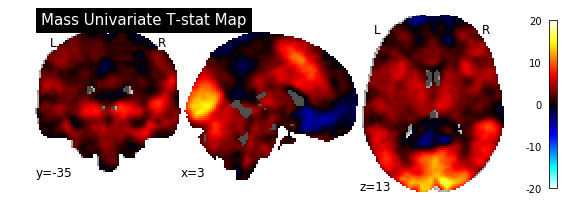

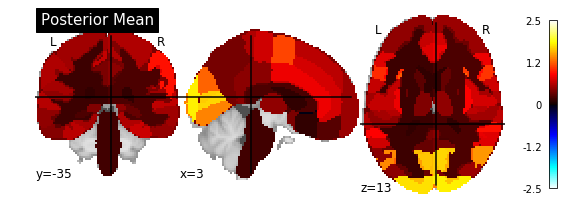

In [9]:
univ = plotting.plot_stat_map(univariateMap, vmax = 20, symmetric_cbar =True, cut_coords = (3, -35, 13), title = 'Mass Univariate T-stat Map', draw_cross=False)
plotting.plot_stat_map(meanMod0, title = 'Posterior Mean', vmax = 2.5, symmetric_cbar =True)
univ.savefig('univariateTMap.pdf')